### Which employee will leave? 

In [58]:
import pandas as pd

In [59]:
hr_df = pd.read_csv("../data/business/hr_data.csv")
hr_df.head(10)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
5,1060,2,153,3,0,1,0,sales,low
6,1061,6,247,4,0,1,0,sales,low
7,1576,5,259,5,0,1,0,sales,low
8,1752,5,224,5,0,1,0,sales,low
9,1988,2,142,3,0,1,0,sales,low


In [60]:
hr_df.tail(10)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14989,87638,2,159,3,1,1,0,technical,low
14990,87639,5,228,5,1,1,0,support,low
14991,87654,6,257,4,0,1,0,support,low
14992,87656,2,155,3,0,1,0,support,low
14993,87661,6,293,6,0,1,0,support,low
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [61]:
hr_df.shape

(14999, 9)

In [62]:
hr_df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

#### 11428 employees did not leave. 3571 left. 

In [63]:
# View which columns are categorical
hr_df.select_dtypes(exclude = ['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [64]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [65]:
# Display values in categorical columns
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


### Loading the evaluation and employee satisfaction dataset

In [66]:
emp_satis_eval = pd.read_excel("../data/business/employee_satisfaction_evaluation.xlsx")
emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [67]:
emp_satis_eval.shape
# we have the satisfaction level for all the employees

(14999, 3)

### Merge or Join tables

In [68]:
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


### Check for missing values

In [69]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


We notice that the missing values are in the two last columns: satisfaction level and last evaluation

### Fill in the missing values with the average values

In [70]:
main_df[["satisfaction_level","last_evaluation"]].describe()

,satisfaction_level,last_evaluation
count,14972.000000,14972.000000
mean,0.612830,0.716125
std,0.248714,0.171138
min,0.090000,0.360000
25%,0.440000,0.560000
50%,0.640000,0.720000
75%,0.820000,0.870000
max,1.000000,1.000000


In [71]:
main_df.fillna(main_df.mean(),inplace = True)
main_df.head()

/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [72]:
main_df[["satisfaction_level","last_evaluation"]][main_df.employee_id == 3794]

,satisfaction_level,last_evaluation
18,0.61283,0.716125


In [73]:
# drop the employee id columns since it won't influence our model
main_df_final = main_df.drop(columns = 'employee_id')

In [74]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [75]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [76]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


### Correlation matrix

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


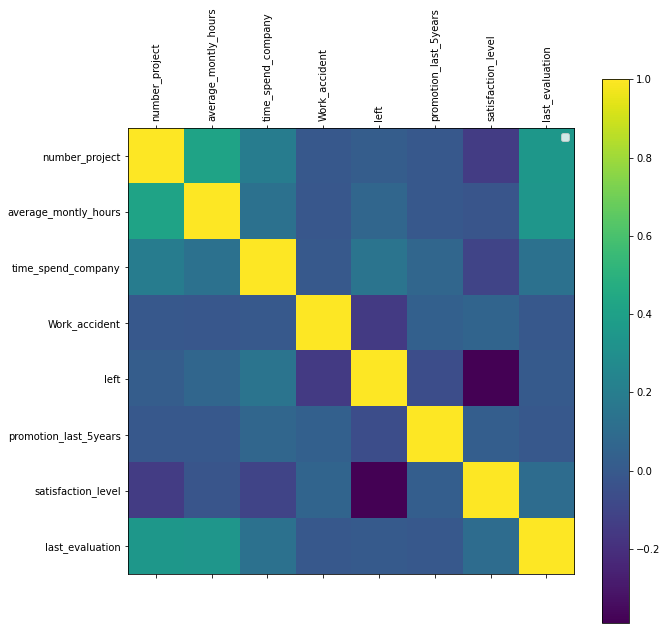

In [77]:
import matplotlib.pyplot as plt
def plot_corr(df,size = 10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size,size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns, rotation = 'vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(main_df_final)

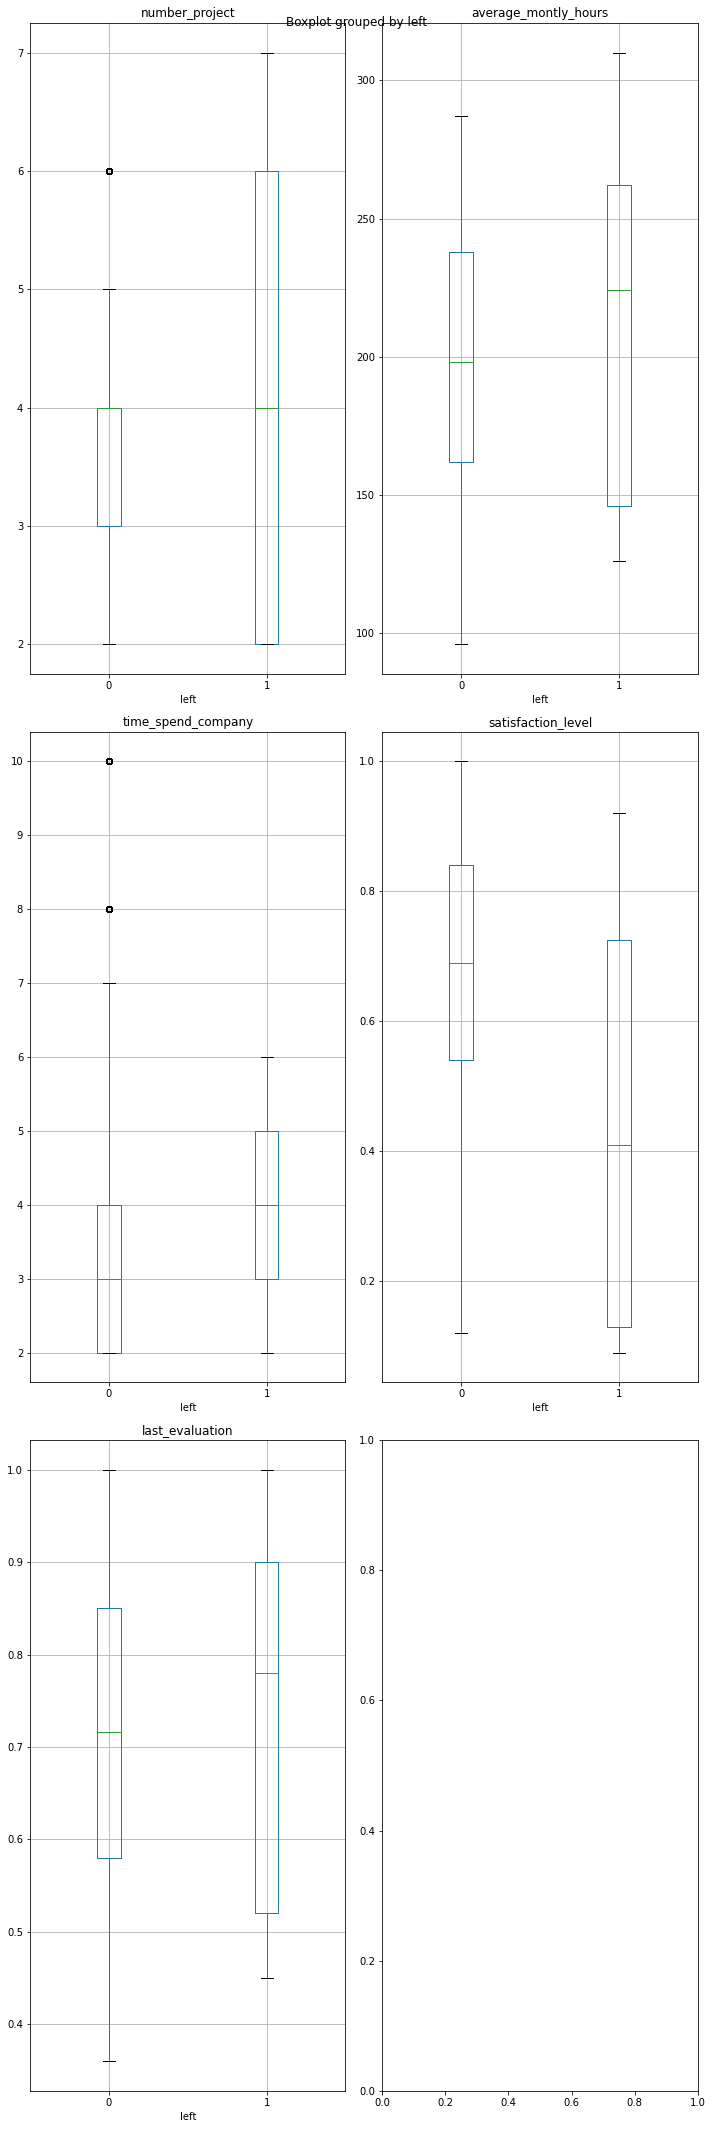

In [78]:
import math
numerical = []
categorical = []
for col in main_df_final.columns:
    dtype = 'categorical' if main_df_final[col].dtype == object else 'numerical'
    numerical.append(col) if dtype == 'numerical' else categorical.append(col)
numerical.remove('left')
numerical.remove('promotion_last_5years')
numerical.remove('Work_accident')


p_col = 2
fig, ax = plt.subplots(3, p_col, figsize=(10, 30))

for idx, feature in enumerate(numerical): 
    col = idx%p_col
    row = math.floor(idx/p_col)
    main_df_final.boxplot(column=feature, by='left', ax = ax[row][col])
    
plt.tight_layout()

### Preparing for ML

In [79]:
# One hot encoding
categorical = ['department', 'salary']
main_df_final = pd.get_dummies(main_df_final, columns = categorical, drop_first= True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [80]:
# Columns num
len(main_df_final.columns)

19

In [81]:
# How many employees in the dataset have left? 
len(main_df_final.loc[main_df_final['left']== 1])

3571

In [82]:
from sklearn.model_selection import train_test_split

X = main_df_final.drop(["left"], axis=1).values
y = main_df_final["left"].values

# Split it to 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [83]:
# scaling the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.967718,1.418948,-0.336852,-0.411599,-0.146297,1.276743,0.599271,-0.233765,-0.232174,-0.225956,-0.212105,-0.247282,-0.253723,1.636279,-0.419009,-0.47353,-0.975628,-0.866771
1,0.155107,1.238489,1.049239,-0.411599,-0.146297,0.591870,1.068198,-0.233765,-0.232174,-0.225956,-0.212105,-0.247282,-0.253723,-0.611143,2.386586,-0.47353,1.024981,-0.866771
2,1.780328,2.140783,1.049239,-0.411599,-0.146297,-2.026762,0.775119,-0.233765,-0.232174,-0.225956,-0.212105,-0.247282,-0.253723,1.636279,-0.419009,-0.47353,-0.975628,1.153707
3,0.967718,-0.084875,0.356193,2.429546,-0.146297,-1.543322,0.071729,4.277807,-0.232174,-0.225956,-0.212105,-0.247282,-0.253723,-0.611143,-0.419009,-0.47353,1.024981,-0.866771
4,0.155107,-0.706456,1.742284,-0.411599,-0.146297,-1.140456,1.302661,-0.233765,-0.232174,-0.225956,-0.212105,-0.247282,-0.253723,-0.611143,-0.419009,2.11180,1.024981,-0.866771


In [85]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,1.396344e-16,2.823619e-16,1.554566e-16,1.181496e-15,5.313505e-16,2.024411e-14,2.395132e-14,-5.650040e-16,-5.356596e-16,1.435502e-15,1.697561e-15,-5.825472e-16,6.716960e-16,4.872334e-16,7.237757e-16,3.426898e-16,-6.535078e-17,2.973778e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.470114e+00,-2.110024e+00,-1.029898e+00,-4.115995e-01,-1.462972e-01,-2.107335e+00,-2.097057e+00,-2.337646e-01,-2.321742e-01,-2.259561e-01,-2.121051e-01,-2.472816e-01,-2.537233e-01,-6.111428e-01,-4.190086e-01,-4.735297e-01,-9.756279e-01,-8.667714e-01
25%,-6.575032e-01,-9.069654e-01,-3.368522e-01,-4.115995e-01,-1.462972e-01,-6.973026e-01,-9.247407e-01,-2.337646e-01,-2.321742e-01,-2.259561e-01,-2.121051e-01,-2.472816e-01,-2.537233e-01,-6.111428e-01,-4.190086e-01,-4.735297e-01,-9.756279e-01,-8.667714e-01
50%,1.551073e-01,-4.671368e-03,-3.368522e-01,-4.115995e-01,-1.462972e-01,1.084304e-01,1.311271e-02,-2.337646e-01,-2.321742e-01,-2.259561e-01,-2.121051e-01,-2.472816e-01,-2.537233e-01,-6.111428e-01,-4.190086e-01,-4.735297e-01,-9.756279e-01,-8.667714e-01
75%,9.677178e-01,8.775717e-01,3.561933e-01,-4.115995e-01,-1.462972e-01,8.335902e-01,8.923502e-01,-2.337646e-01,-2.321742e-01,-2.259561e-01,-2.121051e-01,-2.472816e-01,-2.537233e-01,1.636279e+00,-4.190086e-01,-4.735297e-01,1.024981e+00,1.153707e+00
max,2.592939e+00,2.180885e+00,4.514466e+00,2.429546e+00,6.835402e+00,1.558750e+00,1.654356e+00,4.277807e+00,4.307112e+00,4.425638e+00,4.714645e+00,4.043973e+00,3.941302e+00,1.636279e+00,2.386586e+00,2.111800e+00,1.024981e+00,1.153707e+00


### Train machine learning models

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [100]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
# evaluate each model in turn
for name, model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    score = model.score(X_test,y_test)
    print("******** " + name + " ********")
    print(" Accuracy for {0} : {1:.2f}%".format(name,100*accuracy_score(predictions,y_test)))
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))
    print()


******** LR ********
 Accuracy for LR : 79.04%
[[3156  283]
 [ 660  401]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3439
           1       0.59      0.38      0.46      1061

    accuracy                           0.79      4500
   macro avg       0.71      0.65      0.66      4500
weighted avg       0.77      0.79      0.77      4500


******** LDA ********
 Accuracy for LDA : 78.16%
[[3149  290]
 [ 693  368]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      3439
           1       0.56      0.35      0.43      1061

    accuracy                           0.78      4500
   macro avg       0.69      0.63      0.65      4500
weighted avg       0.76      0.78      0.76      4500


******** KNN ********
 Accuracy for KNN : 93.89%
[[3275  164]
 [ 111  950]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3439
         

# Testing with artificial neural network

In [101]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [113]:
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [114]:
visible = Input(shape=(X_train.shape[1],))
# hidden layer 1
hidden1 = Dense(20, kernel_initializer="uniform", kernel_regularizer=l2(0.01), activation='relu')(visible)
hidden1 = Dropout(0.3)(hidden1)
# hidden layer 2
hidden2 = Dense(40, kernel_initializer="uniform", kernel_regularizer=l2(0.01), activation='relu')(hidden1) 
hidden2 = Dropout(0.3)(hidden2)
# hidden layer 3
hidden3 = Dense(20, kernel_initializer="uniform", kernel_regularizer=l2(0.01), activation='relu')(hidden2) 
hidden3 = Dropout(0.3)(hidden3)

output = Dense(1, activation='sigmoid')(hidden3) 
model = Model(inputs=visible, outputs=output)
# summarize layers
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 18)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                380       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 40)                840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0   

In [115]:
model.compile(optimizer = "adam", loss= "binary_crossentropy", metrics=["accuracy"])

In [116]:
batch_size = 16
epochs = 75
history = model.fit(X_train,
                   y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (X_test,y_test),
                   shuffle = True)

score = model.evaluate(X_test,y_test, verbose = 0)
print("Test loss : ", score[0])
print("Test accuracy: ", score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/75
10499/10499 [==============================] - 3s 264us/sample - loss: 0.4534 - accuracy: 0.7818 - val_loss: 0.3739 - val_accuracy: 0.8640
Epoch 2/75
10499/10499 [==============================] - 1s 124us/sample - loss: 0.3735 - accuracy: 0.8868 - val_loss: 0.3411 - val_accuracy: 0.9182
Epoch 3/75
10499/10499 [==============================] - 1s 124us/sample - loss: 0.3557 - accuracy: 0.9093 - val_loss: 0.3191 - val_accuracy: 0.9296
Epoch 4/75
10499/10499 [==============================] - 1s 124us/sample - loss: 0.3385 - accuracy: 0.9116 - val_loss: 0.3133 - val_accuracy: 0.9233
Epoch 5/75
10499/10499 [==============================] - 1s 124us/sample - loss: 0.3331 - accuracy: 0.9122 - val_loss: 0.3000 - val_accuracy: 0.9336
Epoch 6/75
10499/10499 [==============================] - 1s 125us/sample - loss: 0.3245 - accuracy: 0.9186 - val_loss: 0.2937 - val_accuracy: 0.9336
Epoch 7/75
10499/10499 [===========================

Epoch 55/75
10499/10499 [==============================] - 1s 129us/sample - loss: 0.2846 - accuracy: 0.9210 - val_loss: 0.2590 - val_accuracy: 0.9367
Epoch 56/75
10499/10499 [==============================] - 1s 127us/sample - loss: 0.2853 - accuracy: 0.9236 - val_loss: 0.2551 - val_accuracy: 0.9347
Epoch 57/75
10499/10499 [==============================] - 3s 292us/sample - loss: 0.2873 - accuracy: 0.9193 - val_loss: 0.2504 - val_accuracy: 0.9336
Epoch 58/75
10499/10499 [==============================] - 2s 205us/sample - loss: 0.2796 - accuracy: 0.9211 - val_loss: 0.2572 - val_accuracy: 0.9391
Epoch 59/75
10499/10499 [==============================] - 2s 205us/sample - loss: 0.2881 - accuracy: 0.9194 - val_loss: 0.2528 - val_accuracy: 0.9313
Epoch 60/75
10499/10499 [==============================] - 2s 190us/sample - loss: 0.2868 - accuracy: 0.9198 - val_loss: 0.2525 - val_accuracy: 0.9369
Epoch 61/75
10499/10499 [==============================] - 2s 207us/sample - loss: 0.2792 - ac

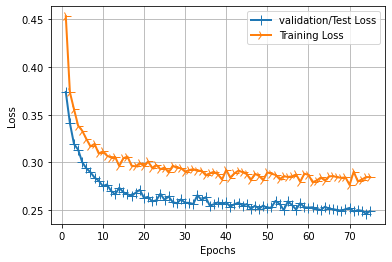

In [117]:
# Plotting loss charts
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

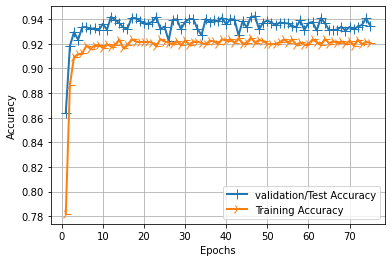

In [118]:
# Plotting accuracy charts
import matplotlib.pyplot as plt
history_dict = history.history
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1,len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [119]:
# Classification report and confusion matrix
predictions = model.predict(X_test)
predictions = (predictions > 0.5)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[3289  150]
 [ 143  918]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3439
           1       0.86      0.87      0.86      1061

    accuracy                           0.93      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.94      0.93      0.93      4500



### Random forest was the best model

In [120]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
score = model.score(X_test,y_test)
print("******** " + name + " ********")
print(" Accuracy for {0} : {1:.2f}%".format(name,100*accuracy_score(predictions,y_test)))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print()

******** Random Forest ********
 Accuracy for Random Forest : 99.22%
[[3435    4]
 [  31 1030]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3439
           1       1.00      0.97      0.98      1061

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500




In [121]:
main_df_final.drop(["left"],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [122]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                  index = pd.DataFrame(X_train).columns,
                                  columns = ["importance"]).sort_values("importance",ascending=False)

In [123]:
feature_importances

,importance
5,0.321492
0,0.182987
2,0.178292
1,0.151756
6,0.122128
3,0.009888
16,0.007658
15,0.004165
13,0.003815
17,0.003765


Feature 5 : satisfaction_level is the most influencing feature on the target. It was the biggest indicator if an employee would leave. 